All Imports

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Markdown
import plotly.express as px
%matplotlib inline

# Load all training data

In [14]:
train_events = pd.read_csv("../../data/old/train_events.csv")

In [15]:
train_series = pd.read_parquet("../../data/old/train_series.parquet")

In [16]:
train_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14510 entries, 0 to 14509
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   series_id  14510 non-null  object 
 1   night      14510 non-null  int64  
 2   event      14510 non-null  object 
 3   step       9587 non-null   float64
 4   timestamp  9587 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 566.9+ KB


In [17]:
train_events.head(25)

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400
5,038441c925bb,3,wakeup,44400.0,2018-08-17T05:10:00-0400
6,038441c925bb,4,onset,57240.0,2018-08-17T23:00:00-0400
7,038441c925bb,4,wakeup,62856.0,2018-08-18T06:48:00-0400
8,038441c925bb,5,onset,NaN,NaN
9,038441c925bb,5,wakeup,NaN,NaN


### Preprocessing

In [18]:
train_events.rename(columns={"timestamp": "timestampOld"}, inplace=True)

In [19]:
train_events['date'] = train_events["timestampOld"].str.split('T', expand=True)[0]
train_events['time'] = train_events['timestampOld'].str.split('T', expand=True)[1].str.split('-', expand=True)[0]
train_events['timestamp'] = pd.to_datetime(train_events['date'] + ' ' + train_events['time'])
train_events['hour'] = train_events['timestamp'].dt.hour.astype("Int64")

In [20]:
train_events.head(15)

,series_id,night,event,step,timestampOld,date,time,timestamp,hour
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400,2018-08-14,22:26:00,2018-08-14 22:26:00,22
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400,2018-08-15,06:41:00,2018-08-15 06:41:00,6
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400,2018-08-15,19:37:00,2018-08-15 19:37:00,19
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400,2018-08-16,05:41:00,2018-08-16 05:41:00,5
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400,2018-08-16,23:03:00,2018-08-16 23:03:00,23
5,038441c925bb,3,wakeup,44400.0,2018-08-17T05:10:00-0400,2018-08-17,05:10:00,2018-08-17 05:10:00,5
6,038441c925bb,4,onset,57240.0,2018-08-17T23:00:00-0400,2018-08-17,23:00:00,2018-08-17 23:00:00,23
7,038441c925bb,4,wakeup,62856.0,2018-08-18T06:48:00-0400,2018-08-18,06:48:00,2018-08-18 06:48:00,6
8,038441c925bb,5,onset,NaN,NaN,NaN,NaN,NaT,<NA>
9,038441c925bb,5,wakeup,NaN,NaN,NaN,NaN,NaT,<NA>


## Train Events - General interesting statistics

We can see that there are 277 series of labelled training data and in total 14510 of rows. There is a lot of variance in the labelled data when looking at the unique nights. This means a high imbalance in series, and some people sleep only a couple of times, while from other persons a lot more sleeps are recorded

In [21]:
print(f"Rows of labelled data: {len(train_events)}")
print(f"Number of series: {train_events['series_id'].nunique()}")
print("-------------------------------------------")
print(f"Average number of nights (sleep + onsets) per series (person): {train_events.groupby('series_id')['night'].nunique().mean().round(3)}")
print(f"Standard deviation number of nights (sleep + onsets) per series (person): {train_events.groupby('series_id')['night'].nunique().std().round(3)}")
print(f"Min of nights (sleep + onsets) per series (person): {train_events.groupby('series_id')['night'].nunique().min().round(3)}")
print(f"Max of nights (sleep + onsets) per series (person): {train_events.groupby('series_id')['night'].nunique().max().round(3)}")
print()

Rows of labelled data: 14510
Number of series: 277
-------------------------------------------
Average number of nights (sleep + onsets) per series (person): 26.188
Standard deviation number of nights (sleep + onsets) per series (person): 8.906
Min of nights (sleep + onsets) per series (person): 2
Max of nights (sleep + onsets) per series (person): 84


Here we look at the average duration of the series in days. 1 step = 5 seconds, so to convert it to days we divide it by the number of 5 seconds in a day. which is 12 * 60 * 24. We can observe that these results differ a lot actually when compared to the number of nights recorded.

In [22]:
print(f"Average series time length per series (person) in days: {round(train_events.groupby('series_id')['step'].max().mean() / (12 * 60 * 24))}")
print(f"Standard deviation (sleep + onsets) per series (person) in days: {round(train_events.groupby('series_id')['step'].max().std() / (12 * 60 * 24))}")
print(f"Min number of days of all series (person): {(train_events.groupby('series_id')['step'].max().min() / (12 * 60 * 24)).round(1)}")
print(f"Max number of days of all series (person): {round(train_events.groupby('series_id')['step'].max().max() / (12 * 60 * 24))}")
train_events.groupby('series_id')["step"].last().mean() / (12 * 60 * 24)

Average series time length per series (person) in days: 21
Standard deviation (sleep + onsets) per series (person) in days: 8
Min number of days of all series (person): 0.5
Max number of days of all series (person): 43


21.099450123915737

### Number of awakenings of each series compared to the time length

<Axes: title={'center': 'Histogram of number of days grouped by each series'}, xlabel='step', ylabel='Count'>

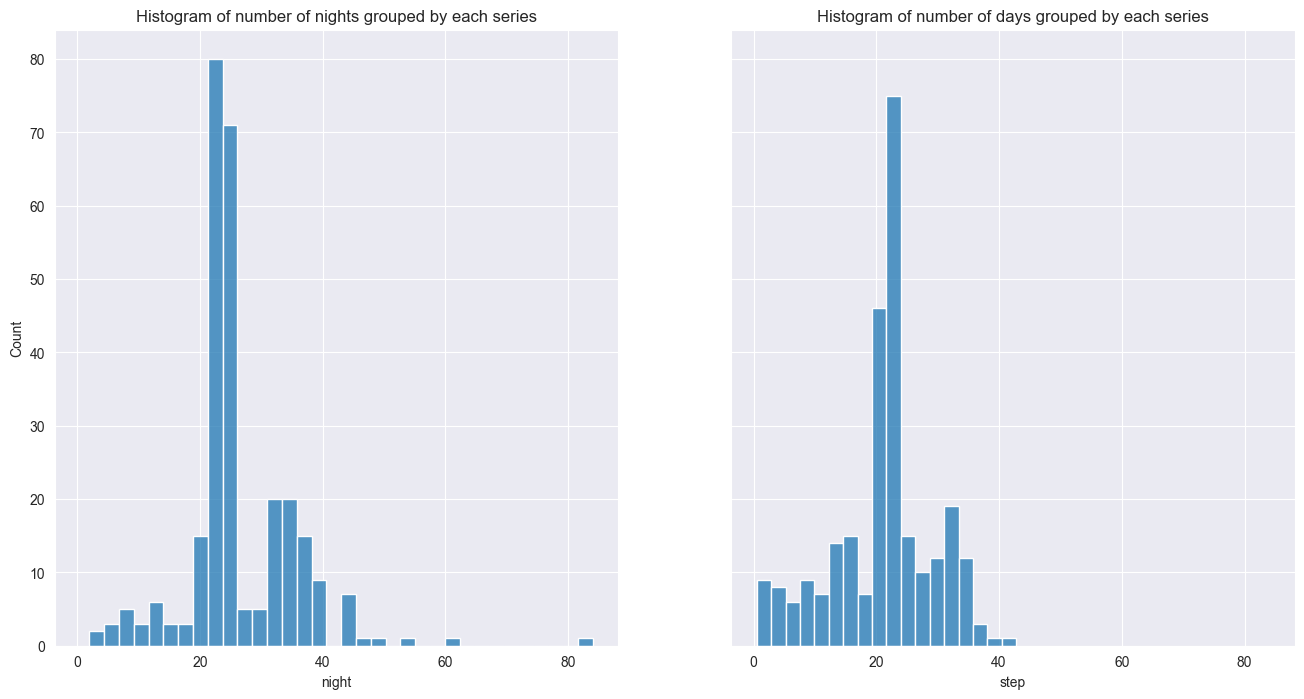

In [23]:
nightDist = train_events.groupby('series_id')['night'].nunique()
timeDist = train_events.groupby('series_id')['step'].max() / (12 * 60 * 24)

fig, ax = plt.subplots(1,2, figsize=(16,8), sharex=True, sharey=True)

ax[0].set_title("Histogram of number of nights grouped by each series")
ax[1].set_title("Histogram of number of days grouped by each series")
sns.histplot(data = nightDist, ax=ax[0])
sns.histplot(data = timeDist, ax=ax[1])

When we take a closer look, we can see that some people would sleep multiple times a day, lets take a deeper look at the outlier of the person with 80+ sleeps.

In [24]:
id_1 = train_events.groupby('series_id')['night'].nunique().idxmax()
max_1 = train_events.groupby('series_id')['night'].nunique().max()

days_1 = train_events[train_events["series_id"] == id_1]["step"].max() / (12 * 60 * 24)
print(f"Outlier that sleeps {max_1} times in {days_1} days with id = {id_1}")
#id_2 = train_events.groupby('series_id')['step'].max().idxmax()



Outlier that sleeps 84 times in 11.547916666666667 days with id = 78569a801a38


It would be interesting to see the sleep / days ratio and compare it.

In [25]:
df_analyse = train_events.groupby('series_id')['night'].nunique().rename("nights").to_frame()
df_dropped_na = train_events.dropna()
df_analyse["nonNaN sleeps"] = df_dropped_na.groupby('series_id')['night'].nunique()

df_analyse["days"] = train_events.groupby('series_id')['step'].max() / (12 * 60 * 24)
df_analyse["nights/day"] = df_analyse["nights"] / df_analyse["days"]
df_analyse["sleep/day"] = df_analyse["nonNaN sleeps"] / df_analyse["days"]
df_analyse.reset_index(inplace=True)
df_analyse.sort_values(by="sleep/day", ascending=False, inplace=True)
df_analyse.head(25)

,series_id,nights,nonNaN sleeps,days,nights/day,sleep/day
200,c5365a55ebb7,21,1.0,0.528472,39.737188,1.892247
93,5aad18e7ce64,24,1.0,0.554167,43.308271,1.804511
167,a2b0a64ec9cf,23,1.0,0.588194,39.102715,1.700118
178,aed3850f65f0,20,1.0,0.728472,27.454719,1.372736
195,c107b5789660,43,1.0,0.754861,56.964121,1.324747
216,cf13ed7e457a,37,1.0,0.777778,47.571429,1.285714
59,349c5562ee2c,2,2.0,1.644444,1.216216,1.216216
173,a88088855de5,11,3.0,2.554167,4.306688,1.174551
72,405df1b41f9f,24,3.0,2.668750,8.992974,1.124122
42,2654a87be968,36,8.0,7.638889,4.712727,1.047273


Aha, here we see that the NaNs are actually the issue, lets zoom in at the series with the largest nights/day score. We can see that there are very large nights/day scores, mostly caused by nights with nans. If we look at most sleeps/day, it is mostly normal having around 1 sleep a day which is logical.

In [26]:
train_events[train_events["series_id"] == 'cf13ed7e457a']

,series_id,night,event,step,timestampOld,date,time,timestamp,hour
10998,cf13ed7e457a,1,onset,8748.0,2018-05-23T00:39:00-0400,2018-05-23,00:39:00,2018-05-23 00:39:00,0
10999,cf13ed7e457a,1,wakeup,13440.0,2018-05-23T07:10:00-0400,2018-05-23,07:10:00,2018-05-23 07:10:00,7
11000,cf13ed7e457a,2,onset,NaN,NaN,NaN,NaN,NaT,<NA>
11001,cf13ed7e457a,2,wakeup,NaN,NaN,NaN,NaN,NaT,<NA>
11002,cf13ed7e457a,3,onset,NaN,NaN,NaN,NaN,NaT,<NA>
...,...,...,...,...,...,...,...,...,...
11067,cf13ed7e457a,35,wakeup,NaN,NaN,NaN,NaN,NaT,<NA>
11068,cf13ed7e457a,36,onset,NaN,NaN,NaN,NaN,NaT,<NA>
11069,cf13ed7e457a,36,wakeup,NaN,NaN,NaN,NaN,NaT,<NA>
11070,cf13ed7e457a,37,onset,NaN,NaN,NaN,NaN,NaT,<NA>


Let's take a look at the data in an ascending fashion. Here we observe something interesting. Some series have around 0.2 sleeps a day which is unlogical. Lets zoom in on the first series 854206f602d0:

In [27]:
df_analyse.sort_values(by="sleep/day", ascending=True, inplace=True)

In [28]:
df_analyse.head(25)
train_events[train_events["series_id"] == '854206f602d0']

,series_id,night,event,step,timestampOld,date,time,timestamp,hour
6923,854206f602d0,1,onset,5016.0,2018-09-21T19:58:00-0400,2018-09-21,19:58:00,2018-09-21 19:58:00,19
6924,854206f602d0,1,wakeup,12444.0,2018-09-22T06:17:00-0400,2018-09-22,06:17:00,2018-09-22 06:17:00,6
6925,854206f602d0,2,onset,NaN,NaN,NaN,NaN,NaT,<NA>
6926,854206f602d0,2,wakeup,NaN,NaN,NaN,NaN,NaT,<NA>
6927,854206f602d0,3,onset,NaN,NaN,NaN,NaN,NaT,<NA>
...,...,...,...,...,...,...,...,...,...
6998,854206f602d0,38,wakeup,NaN,NaN,NaN,NaN,NaT,<NA>
6999,854206f602d0,39,onset,NaN,NaN,NaN,NaN,NaT,<NA>
7000,854206f602d0,39,wakeup,NaN,NaN,NaN,NaN,NaT,<NA>
7001,854206f602d0,40,onset,NaN,NaN,NaN,NaN,NaT,<NA>


This again seems to be caused by NaNs having multiple days without any sleeps recorded. So we can conclude:
- A lot of NaNs in labelled steps and timestamps
- One night seems to correspond with 1 day after dropping the NaNs, which is logical.

To figure out:
- Now it is also interesting to see if there are multiple wakeups and onsets in 1 night! Will be done below

Percentage of all NaNs:

In [29]:
NaNs = (train_events.isna().sum() / len(train_events)) * 100
print(NaNs)

series_id        0.000000
night            0.000000
event            0.000000
step            33.928325
timestampOld    33.928325
date            33.928325
time            33.928325
timestamp       33.928325
hour            33.928325
dtype: float64


We have a lot of NaN values, only 37 series do not have NAN values at all.

In [30]:
series_has_NaN = train_events.groupby('series_id')['step'].apply(lambda x: x.isnull().any())
series_has_NaN.value_counts()
df_has_NaN = series_has_NaN.to_frame()
df_has_NaN.reset_index(inplace=True)

In [31]:
notNaN = df_has_NaN.loc[df_has_NaN.step == False]["series_id"].to_list()
print(f"Number of series that do not contain NaN values: {len(notNaN)}, {notNaN}")

print(f"Percentage of all rows: {round((len(train_events[train_events['series_id'].isin(notNaN)]) / len(train_events)) * 100, 2)}%")

Number of series that do not contain NaN values: 37, ['08db4255286f', '0a96f4993bd7', '0cfc06c129cc', '1087d7b0ff2e', '10f8bc1f7b07', '18b61dd5aae8', '29c75c018220', '31011ade7c0a', '3452b878e596', '349c5562ee2c', '3664fe9233f9', '483d6545417f', '55a47ff9dc8a', '5acc9d63b5fd', '5f94bb3e1bed', '655f19eabf1e', '67f5fc60e494', '72bbd1ac3edf', '76237b9406d5', '7822ee8fe3ec', '89bd631d1769', '8e32047cbc1f', '939932f1822d', '9ee455e4770d', 'a596ad0b82aa', 'a9a2f7fac455', 'a9e5f5314bcb', 'af91d9a50547', 'b364205aba43', 'c535634d7dcd', 'c6788e579967', 'c68260cc9e8f', 'ca730dbf521d', 'd150801f3145', 'd25e479ecbb7', 'd515236bdeec', 'd5e47b94477e']
Percentage of all rows: 10.78%


Here we see for all series the percentage of non null values, sorted descendingly from the 37th series. There are a lot of series that are just missing only a few values.

In [32]:
def count_nan_segments(series):
    nan_mask = series.isna()
    nan_segments = (nan_mask != nan_mask.shift()).cumsum()
    nan_segments = nan_segments[nan_mask]
    return len(nan_segments.unique())

In [33]:
df_percentage_NaNs = train_events.groupby("series_id").apply(lambda x: round(x.notnull().sum()/len(x)*100, 3)).min(axis=1).sort_values(ascending=False)[37:].rename("Percentage Non Null").to_frame()
df_percentage_NaNs["total length"] = train_events.groupby("series_id")["series_id"].count()
df_percentage_NaNs["NaN segments"] = train_events.groupby("series_id")["step"].apply(count_nan_segments)
df_percentage_NaNs.head(5)

,Percentage Non Null,total length,NaN segments
series_id,,,
fcca183903b7,97.222,72,1
653622ac8363,96.970,66,1
e8d0a37c3eba,96.970,66,1
51b23d177971,96.667,60,1
8a306e0890c0,95.918,49,1


In [34]:
df_percentage_NaNs.sort_values(by="NaN segments", ascending=False).head()

,Percentage Non Null,total length,NaN segments
series_id,,,
280e08693c6d,60.000,70,9
6ca4f4fca6a2,65.909,88,9
6bf95a3cf91c,62.500,48,8
702bb5387b1e,58.333,48,8
ee4e0e3afd3d,60.000,50,7


In [35]:
train_events[train_events["series_id"] == '280e08693c6d']

,series_id,night,event,step,timestampOld,date,time,timestamp,hour
2314,280e08693c6d,1,onset,6768.0,2019-03-19T20:39:00-0400,2019-03-19,20:39:00,2019-03-19 20:39:00,20
2315,280e08693c6d,1,wakeup,14172.0,2019-03-20T06:56:00-0400,2019-03-20,06:56:00,2019-03-20 06:56:00,6
2316,280e08693c6d,2,onset,23712.0,2019-03-20T20:11:00-0400,2019-03-20,20:11:00,2019-03-20 20:11:00,20
2317,280e08693c6d,2,wakeup,31440.0,2019-03-21T06:55:00-0400,2019-03-21,06:55:00,2019-03-21 06:55:00,6
2318,280e08693c6d,3,onset,NaN,NaN,NaN,NaN,NaT,<NA>
...,...,...,...,...,...,...,...,...,...
2379,280e08693c6d,33,wakeup,NaN,NaN,NaN,NaN,NaT,<NA>
2380,280e08693c6d,34,onset,NaN,NaN,NaN,NaN,NaT,<NA>
2381,280e08693c6d,34,wakeup,NaN,NaN,NaN,NaN,NaT,<NA>
2382,280e08693c6d,35,onset,594060.0,2019-04-22T20:20:00-0400,2019-04-22,20:20:00,2019-04-22 20:20:00,20


### NaN approaches:
So in total we have a lot of NaNs (34% rows are NaNs), only 10.78% of the series contains no NaNs at all, and some series contains multiple segments of NaNs. As an example what segmented NaNs mean given a single series: labelled--NaN-labelled-NaN would be 2 NaN segments in the series. All of the NaNs are currently useless since, the important `steps` label are missing. We have a couple of ideas how to tackle them:
- We could drop all series that contain at least 1 NaN. This will result in 100 - 10.78 = 89.22% loss of training data. This is not the ideal option, since there are multiple series that only have a few NaNs and contains useful other labelled data.
- We could drop all rows that contains a NaN value. This will result in 34% loss of data. We have multiple techniques to then further use the data>
    - Segment this 'unlabelled' data in terms of step ranges and cut these steps out of the signal data and glue them back together.
    - We split all current series up in smaller series, split on non NA segments. In this way, we will get more smaller series. Series of 1 person will be split up into multiple.
- We could make use of semi-supervised ML techniques to label the unlabelled data! We train it on the labelled set, and then use this to label the unlabelled data so predict the missing steps / timeframe for the missing NaNs. In this way, we would not need to drop any data, but can has downside that it would hurt the performance of our eventual model if our predicted added data is not accurate by the semi-supervised learning model.

## Train Series - Null check

The train series contains the full sensor data (anglez and enmo) accelerometer features of all series at each step.

In [36]:
train_series.head()

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.6367,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.6368,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.6370,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.6368,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.6368,0.0215


In [37]:
train_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127946340 entries, 0 to 127946339
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   series_id  object 
 1   step       uint32 
 2   timestamp  object 
 3   anglez     float32
 4   enmo       float32
dtypes: float32(2), object(2), uint32(1)
memory usage: 3.3+ GB


Let's check if there is any null data here!

In [38]:
train_series.isna().sum()

series_id    0
step         0
timestamp    0
anglez       0
enmo         0
dtype: int64

Ok great! We have no null values :)

### Visualisations

This section contains some nice visualisations that can give more insight in the data. Let's drop all the na rows right now.

In [39]:
train_events = train_events.dropna().reset_index()

#### Fig 1: Sleep onset and wakeup times

<Axes: xlabel='hour', ylabel='count'>

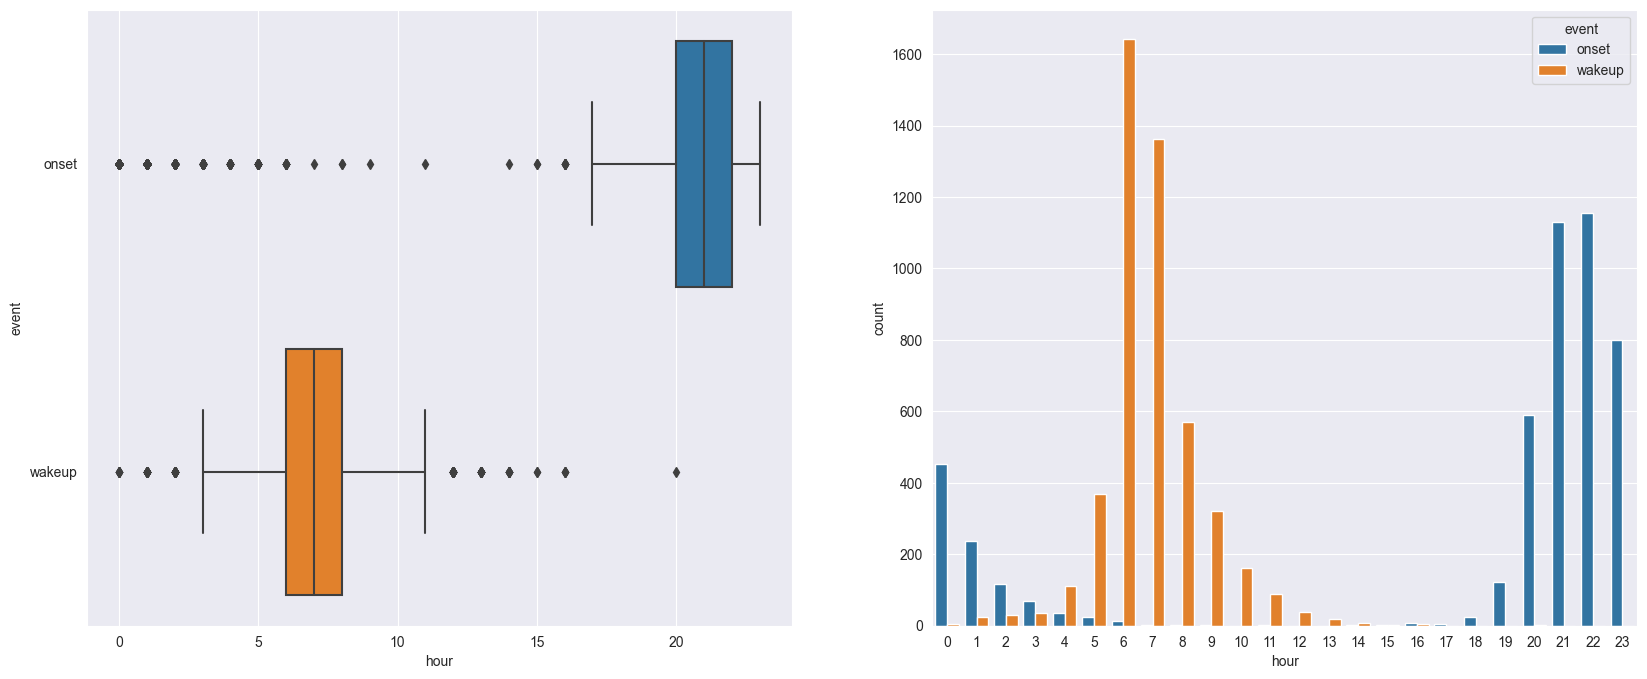

In [40]:
fig, ax = plt.subplots(1,2,figsize=( 20,8))
sns.boxplot(data=train_events, x="hour", y="event", ax=ax[0])
sns.countplot(data=train_events, x="hour", hue="event", ax=ax[1])

**Description of results**
From here we could observe that onset and wakeup times differ quite much. Mostly the sleep onset starts around 21 h on average which is logical, furthermore they wake up at 7 on avg. But there are also some outliers. Some people even start sleeping at 6AM, or wake up at 13PM which is very late.

#### Fig 2: Length of sleep


In [41]:
train_events.head()
df_sleep = train_events.copy()
df_sleep['sleep_length'] = df_sleep.groupby('night')['timestamp'].diff()
sleep_data = df_sleep[df_sleep['event'] == 'wakeup']
sleep_data['sleep_hours'] = sleep_data["sleep_length"].dt.components.hours + sleep_data["sleep_length"].dt.components.minutes / 60
sleep_data.head()
# df_sleep.head(25)

C:\Users\hjdeh\AppData\Local\Temp\ipykernel_22412\617809799.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_data['sleep_hours'] = sleep_data["sleep_length"].dt.components.hours + sleep_data["sleep_length"].dt.components.minutes / 60


,index,series_id,night,event,step,timestampOld,date,time,timestamp,hour,sleep_length,sleep_hours
1,1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400,2018-08-15,06:41:00,2018-08-15 06:41:00,6,0 days 08:15:00,8.250000
3,3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400,2018-08-16,05:41:00,2018-08-16 05:41:00,5,0 days 10:04:00,10.066667
5,5,038441c925bb,3,wakeup,44400.0,2018-08-17T05:10:00-0400,2018-08-17,05:10:00,2018-08-17 05:10:00,5,0 days 06:07:00,6.116667
7,7,038441c925bb,4,wakeup,62856.0,2018-08-18T06:48:00-0400,2018-08-18,06:48:00,2018-08-18 06:48:00,6,0 days 07:48:00,7.800000
9,11,038441c925bb,6,wakeup,97860.0,2018-08-20T07:25:00-0400,2018-08-20,07:25:00,2018-08-20 07:25:00,7,0 days 09:07:00,9.116667


In [42]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4794 entries, 1 to 9586
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   index         4794 non-null   int64          
 1   series_id     4794 non-null   object         
 2   night         4794 non-null   int64          
 3   event         4794 non-null   object         
 4   step          4794 non-null   float64        
 5   timestampOld  4794 non-null   object         
 6   date          4794 non-null   object         
 7   time          4794 non-null   object         
 8   timestamp     4794 non-null   datetime64[ns] 
 9   hour          4794 non-null   Int64          
 10  sleep_length  4794 non-null   timedelta64[ns]
 11  sleep_hours   4794 non-null   float64        
dtypes: Int64(1), datetime64[ns](1), float64(2), int64(2), object(5), timedelta64[ns](1)
memory usage: 491.6+ KB


In [43]:
series_to_select = 5
small_series = sleep_data["series_id"].unique()[:series_to_select]
small_sleep_data = sleep_data[sleep_data["series_id"].isin(small_series)]

<Axes: xlabel='sleep_hours', ylabel='Count'>

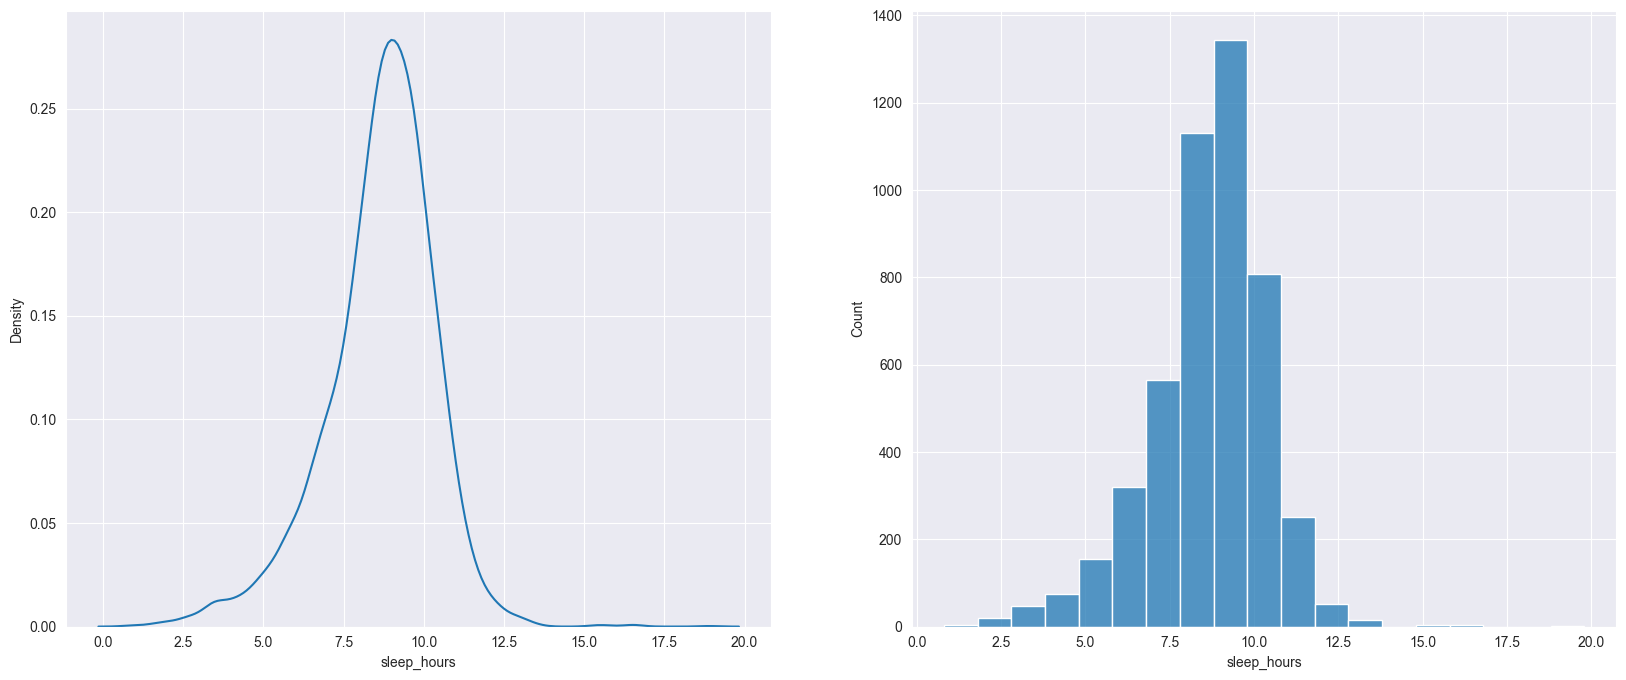

In [44]:
fig,ax = plt.subplots(1,2,figsize=(20, 8))
sns.kdeplot(data = sleep_data, x="sleep_hours", ax=ax[0])
sns.histplot(data = sleep_data, x="sleep_hours",binwidth=1, ax=ax[1])

<Axes: xlabel='night', ylabel='sleep_hours'>

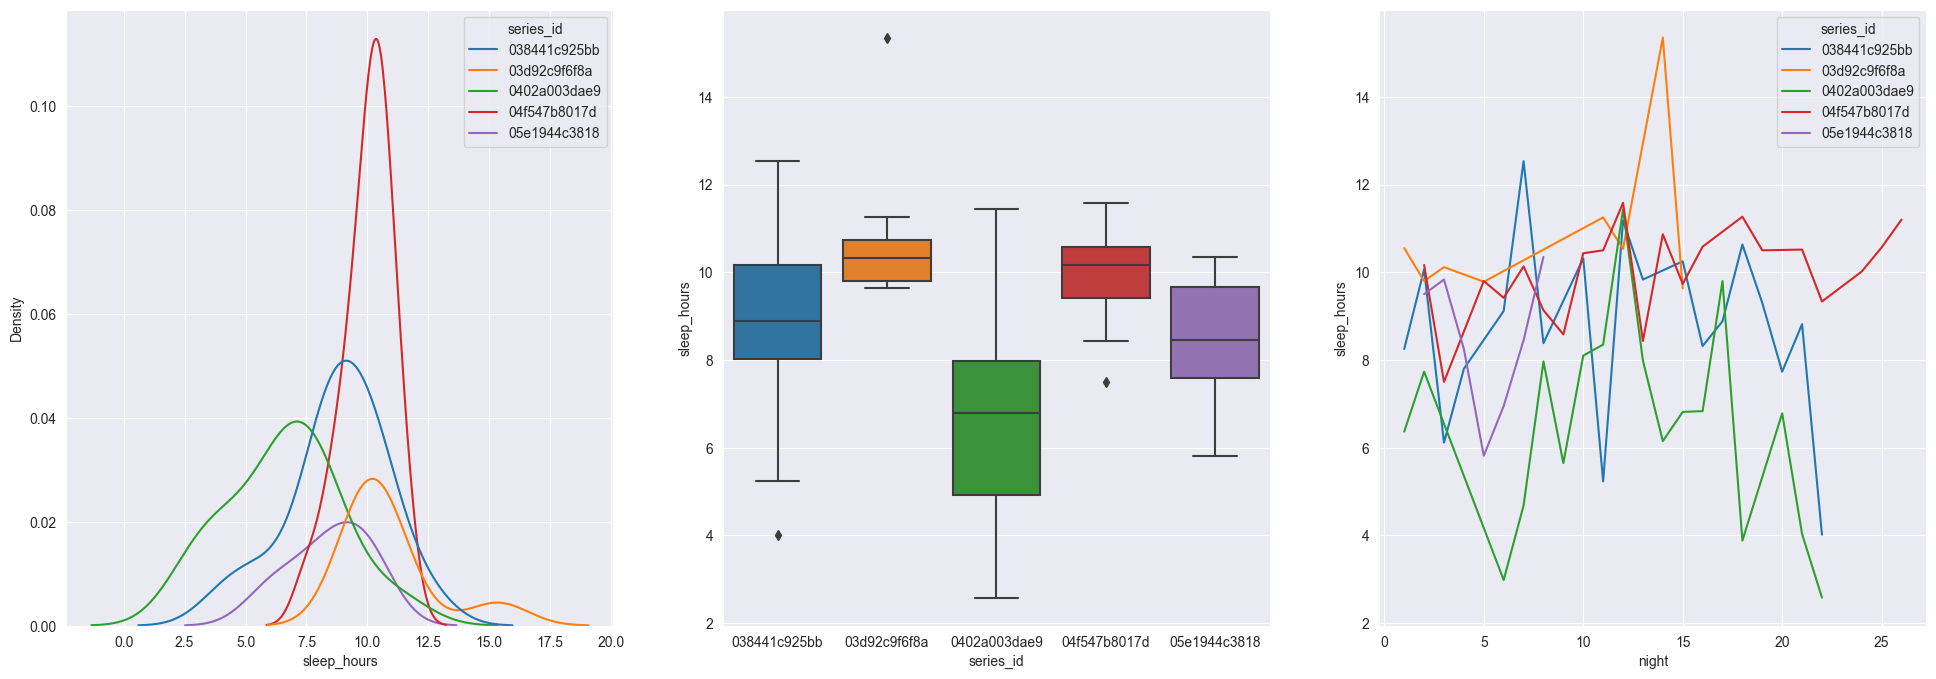

In [45]:
fig,ax = plt.subplots(1,3,figsize=(24, 8))
sns.kdeplot(data = small_sleep_data, x="sleep_hours",hue="series_id", ax=ax[0])
sns.boxplot(data = small_sleep_data, x="series_id",y="sleep_hours", ax=ax[1])
sns.lineplot(small_sleep_data, x="night", y= "sleep_hours", ax=ax[2], hue="series_id")

**Description of results**
From the results above we could observe that different people have very different sleep schedules, the variance and the hours of sleep seems to differ a lot per night. Furthermore, on average people seem to sleep around 8-10 hours a night which would be logical for children.

### Figure 3: Visualize the onset and awakening of each series overtime with the sensor data

In [65]:
series_start = 5
series_end = 5

In [66]:
def get_train_series(train_series, train_events, series):
    current_series = train_series[train_series["series_id"] == series]
    current_events = train_events[train_events["series_id"] == series]

    # cleaning etc.
    current_events = current_events.dropna()
    current_events["step"]  = current_events["step"].astype("int")
    current_events["awake"] = current_events["event"].replace({"onset":1,"wakeup":0})

    train = pd.merge(current_series, current_events[['step','awake']], on='step', how='left')
    train["awake"] = train["awake"].bfill(axis ='rows')
    # final section:
    # train_events.groupby('series_id').tail(1)["event"].unique()
    # Result: the last event is always a "wakeup"
    train['awake'] = train['awake'].fillna(1) # awake
    train["awake"] = train["awake"].astype("int")
    
    
    return(train)

In [1]:
clean_train_data = []

for series_id in notNaN[series_start:series_end+1]:
    train = get_train_series(train_series, train_events, series_id)
    clean_train_data.append(train)


    train['slope'] = abs(train['anglez'].diff()).clip(upper=10)
    train['movement'] = train['slope'].rolling(window=100).median()
    train['pred'] = (train['movement'] > .2).astype(float).rolling(window=10).median()

    awake_0_df = train[train['awake'] == 0]
    awake_1_df = train[train['awake'] == 1]

    # Show the anglez plot
    fig, ax = plt.subplots(figsize=(20, 3))

    fig_anglez = px.line()
    fig_anglez.add_scatter(x=awake_0_df['step'], y=awake_0_df['anglez'], mode='lines', name='Awake=0', line=dict(color='blue'))
    fig_anglez.add_scatter(x=awake_1_df['step'], y=awake_1_df['anglez'], mode='lines', name='Awake=1', line=dict(color='red'))
    fig_anglez.add_scatter(x=train['step'], y=train['movement'], mode='lines', name='Movement', line=dict(color='green'))
    fig_anglez.add_scatter(x=train['step'], y=train['pred'] * 50, mode='lines', name='Prediction', line=dict(color='black'))
    fig_anglez.update_xaxes(title='Timestamp')
    fig_anglez.update_yaxes(title='Anglez')
    fig_anglez.update_layout(title=f'Anglez for Series ID: {series_id}')
    fig_anglez.show()



    # Show the enmo plot
    fig, ax = plt.subplots(figsize=(20, 3))
    fig_enmo = px.line()
    fig_enmo.add_scatter(x=awake_0_df['step'], y=awake_0_df['enmo'], mode='lines', name='Awake=0', line=dict(color='blue'))
    fig_enmo.add_scatter(x=awake_1_df['step'], y=awake_1_df['enmo'], mode='lines', name='Awake=1', line=dict(color='red'))
    # fig_enmo.add_scatter(x=train['step'], y=train['movement'], mode='lines', name='Movement', line=dict(color='green'))
    # fig_enmo.add_scatter(x=train['step'], y=train['pred'] *5, mode='lines', name='Prediction', line=dict(color='black'))
    fig_anglez.update_xaxes(tickvals=train['step'][::len(train) // 10], tickangle=45)

    fig_enmo.update_xaxes(title='Timestamp')
    fig_enmo.update_yaxes(title='enmo')
    fig_enmo.update_layout(title=f'enmo for Series ID: {series_id}')
    fig_enmo.show()

    
    
    # Show the first plot using matplotlib
    #display(Markdown('###  anglez for series ' + series_id))
    # fig, ax = plt.subplots(figsize=(20, 3))
    # sns.lineplot(data=train, x="step", y="anglez",hue="awake", linewidth = 0.5)
    # plt.show();
    # display(Markdown('###  enmo for series ' + series_id))
    # fig, ax = plt.subplots(figsize=(20, 3))
    # sns.lineplot(data=train, x="step", y="enmo",hue="awake", linewidth = 0.5)
    # plt.show()
    del train

##train.head(25)


NameError: name 'notNaN' is not defined

**Description of results**
Here we could see that for the first 2 features, the sensor data is a lot different when awake vs when asleep. This is also logical, since a person would move less regularly in sleep.

### Investigation: How many sleeps are there in 1 night?

Ok, so we have figured out that 1 night corresponds to 1 day, but could there be multiple sleeps (onsets + wakeups in 1 single night)? Lets analyze this!

In [49]:
train_events.head()

,index,series_id,night,event,step,timestampOld,date,time,timestamp,hour
0,0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400,2018-08-14,22:26:00,2018-08-14 22:26:00,22
1,1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400,2018-08-15,06:41:00,2018-08-15 06:41:00,6
2,2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400,2018-08-15,19:37:00,2018-08-15 19:37:00,19
3,3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400,2018-08-16,05:41:00,2018-08-16 05:41:00,5
4,4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400,2018-08-16,23:03:00,2018-08-16 23:03:00,23


Let's count the number of events in each night:

In [50]:
onset_wake_series = train_events.groupby(["series_id", "night"])["event"].value_counts()
onset_wake_series.head(10)

series_id     night  event 
038441c925bb  1      onset     1
                     wakeup    1
              2      onset     1
                     wakeup    1
              3      onset     1
                     wakeup    1
              4      onset     1
                     wakeup    1
              6      onset     1
                     wakeup    1
Name: count, dtype: int64

We can see here that some nights are missing, they have been dropped already in the preprocessing seen above. Below we can see that only 3 times we observe 2 onsets or 2 wakeups. It is weird that this is uneven, since this must mean that there are 2 onsets and 1 wakeup once for example? or the otherway around. Let's analyse these cases further.

In [51]:
onset_wake_series.value_counts()

count
1    9581
2       3
Name: count, dtype: int64

Here we find the series with the count 2. It seem to all be sleep onset events, that are then closed by 1 awakening.. this cannot be right. Let's print out these cases.

In [52]:
onset_wake_series.value_counts()
onset_wake_series[onset_wake_series == 2]

series_id     night  event
655f19eabf1e  3      onset    2
8a306e0890c0  11     onset    2
c6788e579967  20     onset    2
Name: count, dtype: int64

**Case 1**


In [53]:
check_df = train_events[train_events["series_id"] == "655f19eabf1e"]
check_df2 = check_df[check_df["night"] == 3]

check_df2.head()

,index,series_id,night,event,step,timestampOld,date,time,timestamp,hour
3815,5362,655f19eabf1e,3,onset,43104.0,2017-11-12T01:07:00-0400,2017-11-12,01:07:00,2017-11-12 01:07:00,1
3816,5363,655f19eabf1e,3,onset,43824.0,2017-11-12T01:07:00-0500,2017-11-12,01:07:00,2017-11-12 01:07:00,1
3817,5364,655f19eabf1e,3,wakeup,48420.0,2017-11-12T07:30:00-0500,2017-11-12,07:30:00,2017-11-12 07:30:00,7


**Case 2**

In [54]:
check_df = train_events[train_events["series_id"] == "8a306e0890c0"]
check_df2 = check_df[check_df["night"] == 11]

check_df2.head()

,index,series_id,night,event,step,timestampOld,date,time,timestamp,hour
5080,7357,8a306e0890c0,11,onset,178464.0,2017-11-12T01:37:00-0400,2017-11-12,01:37:00,2017-11-12 01:37:00,1
5081,7358,8a306e0890c0,11,onset,179184.0,2017-11-12T01:37:00-0500,2017-11-12,01:37:00,2017-11-12 01:37:00,1
5082,7359,8a306e0890c0,11,wakeup,184536.0,2017-11-12T09:03:00-0500,2017-11-12,09:03:00,2017-11-12 09:03:00,9


**Case 3**

In [55]:
check_df = train_events[train_events["series_id"] == "c6788e579967"]
check_df2 = check_df[check_df["night"] == 20]

check_df2.head()

,index,series_id,night,event,step,timestampOld,date,time,timestamp,hour
7010,10349,c6788e579967,20,onset,333552.0,2018-11-11T01:16:00-0400,2018-11-11,01:16:00,2018-11-11 01:16:00,1
7011,10350,c6788e579967,20,onset,334272.0,2018-11-11T01:16:00-0500,2018-11-11,01:16:00,2018-11-11 01:16:00,1
7012,10351,c6788e579967,20,wakeup,340404.0,2018-11-11T09:47:00-0500,2018-11-11,09:47:00,2018-11-11 09:47:00,9


Very interesting observations we can see here above, there are 2 onsets and 1 wakeup in a night where the onsets are at different steps but at the same timestamp! This seems to be a data error, and these duplicate wrong rows should eventually be reviewed. When calculated, row 3815(case 1), row 5080(case 2), row 7010 (case 3). Seem to be wrong when calculated the step difference between onset and wakeup. For these cases the timestamp would not add up. So they should be removed:

In [56]:
to_remove = [3815, 5080, 7010]
train_events.drop(train_events.index[to_remove], inplace=True)

In [57]:
onset_wake_series = train_events.groupby(["series_id", "night"])["event"].value_counts().value_counts()
onset_wake_series.head()

count
1    9584
Name: count, dtype: int64

It is now fixed! No more 2 sleeps a night, and every night corresponds to 1 sleep

Future research:

!!!How to deal with NaN values in the events dataset?


Calculate Average sleep duration (difference onset - go to bed) - DONE
Check how many nights there are in 24 hours (histogram plot) - DONE
We have to count how many nights there are in a day. (Could there be multiple by their definition of night?) - DONE


NANs can be caused by:
    - No watch worn during the night
    - No valid sleep window identified
    
Important
    - < 30 minutes of activity during sleep does not induce wakeup!
    - nights are determined by onset + wakeup of the person. Not on the daytime
    - Only longest sleep window is recorded every night
    
